In [4]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Goal of Analysis
My goal with this exploratory analysis is to:
* Practice using python for data importing, data cleaning, and exploratory data analysis
* Explore course evaluation data from NYU Stern School of Business
* Create a final data table that has the current semester's course offerings with the average course evaluation for each course to help students choose which one to take
* Answer the following questions:
    Who are the best professors?
    What are the best courses?
    Which department recieves the best and worst ratings?
    Which department/course/professor is the most demanding of a student's time?

# Data Source
Course faculty evaluation data was downloaded directly from the school's evaluation web page.  There was a limit in the number of rows in each download, so multiple excel files were generated so fetch data beginning in the summer of 2013 to the winter of 2018.

### Data Range
* Summer 2011 through Spring 2018.
* Beginning Summer 2011, courses were renamed which would complicate the data wrangling below.  I do not believe eliminating data before Summer 2011 will present a problem with my analysis.  The most recent data from course evaluations will be the most relevant to predict future course evaluations.  This assumption is explored further during data exploration.
* After Spring 2018, the survey method was changed to limit the number of survey questions and the scale (changed to 1-5 instead of 1-7).  This data will need to be evaluated seperately or the survey results will need to be normalized to include in the data set.  This will be explored to determine if it is a good idea or not.

### Data Survey Questions
* Q1 = The instructor was well prepared.
* Q2 = The instructor communicated well.
* Q3 = The instructor motivated me to learn.
* Q4 = Overall evaluation of the instructor.
* Q5 = This course was challenging and made me think.
* Q6 = This course was appropriately demanding of my time.
* Q7 = This course was relevant to my business education.
* Q8 = Overall evaluation of the course.
* Q9* = This course provided learning opportunities to increase awareness of how I communicate in teams and practice peer feedback.

*Only for NOCR Courses

# Data Cleaning

In [5]:
#checking working directory
import os
dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)
os.getcwd()
os.chdir('C:\\Users\\dancb\\OneDrive\\Documents\\Stern ClassX\\data')

current directory is : C:\Users\dancb
Directory name is : dancb


In [6]:
#loading one of the xlsx files with pandas
df = pd.read_excel("raw data/2013_data_FallSummer.xlsx", sheet_name="means")

In [7]:
df.head(10)

,Q1 = The instructor was well prepared.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,Q2 = The instructor communicated well.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q3 = The instructor motivated me to learn.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Q4 = Overall evaluation of the instructor.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Q5 = This course was challenging and made me t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Q6 = This course was appropriately demanding o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Q7 = This course was relevant to my business e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Q8 = Overall evaluation of the course.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,NaN,NaN
9,2013F,ACCT-GB.2303,001,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"YEO, JULIAN",30,28,26,3.9,...,5.2,5.3,0.3,0.3,5.6,5.7,5.4,5.5,NaN,NaN


In [8]:
len(df) #returns the number of rows in the data frame

476

### Removing non-data rows

The data frame has 476 rows, but there are several rows of explanation about the survey questions (see rows 0 through 6) so I'll need to remove those.

I'll first set the data frame header row since it is currently set as one of the rows of explanation that we want to remove.  Row 8 is the actual header for the data table.

In [9]:
#Setting row 8 as the header row
#iloc is a method to call a specific row by its index.  In this case, we are calling row 8
#columns is used to set the column headers.
#the code below sets the column headers to the values in row 8
df.columns = df.iloc[8] 
df.head(2)

8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,nan,nan
0,Q2 = The instructor communicated well.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Q3 = The instructor motivated me to learn.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The column names are now what they should be.

Looking at column "TM" (which is the term of the course) the rows I want to keep have a year followed by a letter which signifies the semester and year (2013F means Fall semester of 2013).  

In this same column there are rows that contain the survey questions explanations.  Since each of these rows starts with a "Q" and the rows I want to keep do not, I could delete all the rows that have a "Q".  There are also duplicate header rows that contain "TM" that I need to remove.  Additionally, the rows that have NaN in the first column can be deleted as well.

In [10]:
#In the df data frame, only select rows that do not contain (~) a "Q" or "TM" in the rows of the column "TM".
#These rows are reassigned to df
df = df[~df['TM'].str.contains("Q|TM", na=False)] 

#Next, only select rows have nonnull values in the column "TM" and reassign those to the df data frame
df = df[pd.notnull(df['TM'])] 

#Now I'm checking the data frame to make sure the rows were dropped as expected
len(df) #returns the number of rows in the data frame

454

Now the data frame has 454 rows which means 22 (476 - 454) rows were removed.

In [11]:
df.head(2)

8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,nan,nan
9,2013F,ACCT-GB.2303,001,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"YEO, JULIAN",30,28,26,3.9,...,5.2,5.3,0.3,0.3,5.6,5.7,5.4,5.5,NaN,NaN
10,2013F,ACCT-GB.2303,010,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"FRIED, HAIM-DOV",38,33,31,3.3,...,5.7,5.8,0.5,0.5,5.9,6,5.5,5.6,NaN,NaN


### Dropping NaN columns
-----

I see there are a couple of columns at the right end of the data frame that contain NaNs so I want to drop those as well.  I'll use the dropna function.  From the pandas help page, the axis parameter should be set to 1 to tell python to drop columns (axis=0 would drop rows).  I'll also use "how" set to "all" to specify that only columns that contain all NaNs should be dropped.

#### From pandas help page

    axis : {0 or ‘index’, 1 or ‘columns’}, default 0

    Determine if rows or columns which contain missing values are removed.

    0, or ‘index’ : Drop rows which contain missing values.
    1, or ‘columns’ : Drop columns which contain missing value.

    how : {‘any’, ‘all’}, default ‘any’

    Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.

    ‘any’ : If any NA values are present, drop that row or column.
    ‘all’ : If all values are NA, drop that row or column.

In [12]:
df = df.dropna(axis=1, how='all')

In [13]:
#Verifying that the last two columns were dropped
df.head(2)

8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,nan,nan
9,2013F,ACCT-GB.2303,001,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"YEO, JULIAN",30,28,26,3.9,...,5.2,5.3,0.3,0.3,5.6,5.7,5.4,5.5,NaN,NaN
10,2013F,ACCT-GB.2303,010,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"FRIED, HAIM-DOV",38,33,31,3.3,...,5.7,5.8,0.5,0.5,5.9,6,5.5,5.6,NaN,NaN


### NaN columns weren't dropped!

Since the columns were not removed with the dropna function, I suspect there are a few rows that do not contain NaN values.  I can check on this using the isnull function.  All columns returned False which tells me there are values in some of the rows that I thought contained all NaNs.

In [14]:
#Check each column for all null values
df.isnull().all()

8
TM           False
CRS_N        False
CRS_SEC      False
TITLE        False
UID          False
INSTR        False
N_ST         False
R_ST         False
TRIM_ST      False
AVG_X_GR     False
AVG_A        False
AVG_B        False
AVG_C        False
AVG_D        False
AVG_F        False
AVG_Q1       False
AVG_Q1_TR    False
AVG_Q2       False
AVG_Q2_TR    False
AVG_Q3       False
AVG_Q3_TR    False
AVG_Q4       False
AVG_Q4_TR    False
AVG_Q5       False
AVG_Q5_TR    False
AVG_Q6       False
AVG_Q6_TR    False
AVG_Q7       False
AVG_Q7_TR    False
AVG_Q8       False
AVG_Q8_TR    False
NaN          False
NaN          False
dtype: bool

Looking at the data frame again, I see there are some values in the alleged NaN columns in row 464.  

I checked over the data source again and alas there is an extra survey question for some courses:  "Q9 = This course provided learning opportunities to increase awareness of how I communicate in teams and practice peer feedback."

Since the answer to this survey question is not going to be a part of the final data frame, I will simply drop these columns.

### Where are the nonnull rows?

I can use a function called first_valid_index() to find the first nonnull row in a column.  Since the column name is also NaN, I'm going to use iloc to refer to the column by its index.  I know there are 33 columns, so I will check column index 31 and 32 (columns start at 0).

I'll have to use 

    iloc[: , COLUMN_INDEX]
    
to call columns.

In [15]:
df.iloc[:,32].first_valid_index()

464

Ok, so now I know row 464 has values in the column I thought had all NaNs.  Let's check it out.

I'll use the loc function, but I need the double brackets around the row number!

In [16]:
df.loc[[464]]

8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,nan,nan
464,2013F,NOCR-GB.2045,0A1,TEAM COMMUNICATION,XXXXXXXXX,"LENNARD, DIANE",33,27,25,4,...,5.4,5.5,0.4,0.3,6.1,6.2,6,6.1,6.6,6.7


There is definitely data in the column!  Now I want to view all the rows that have data in those columns.

In [17]:
#df[:,32].notnull()
df.loc[df.iloc[:,32].notnull()]

8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,nan,nan
464,2013F,NOCR-GB.2045,0A1,TEAM COMMUNICATION,XXXXXXXXX,"LENNARD, DIANE",33,27,25,4,...,5.4,5.5,0.4,0.3,6.1,6.2,6,6.1,6.6,6.7
465,2013F,NOCR-GB.2045,0A2,TEAM COMMUNICATION,XXXXXXXXX,"STEHLIK, SUSAN",33,27,25,3.9,...,5.1,5.2,0.5,0.5,5.9,6,5.7,5.8,6,6.1
466,2013F,NOCR-GB.2045,0A3,TEAM COMMUNICATION,XXXXXXXXX,"SCHENKLER, IRVING",32,26,24,4,...,5.4,5.4,0.3,0.2,5.9,6,6,6,6.4,6.5
467,2013F,NOCR-GB.2045,0A4,TEAM COMMUNICATION,XXXXXXXXX,"PURDY, DAVID A",33,28,26,3.8,...,5.6,5.6,0.1,0.1,5.7,5.8,6,6,6.2,6.3
468,2013F,NOCR-GB.2045,0A5,TEAM COMMUNICATION,XXXXXXXXX,"YOUNGER, JEFFREY J.",32,29,27,3.8,...,5.4,5.4,0.4,0.3,5.9,6,5.8,5.9,6.3,6.4
469,2013F,NOCR-GB.2045,0A6,TEAM COMMUNICATION,XXXXXXXXX,"WOLFF, ALINE",32,29,27,3.9,...,4.7,4.7,0.2,0.2,5.2,5.2,5.1,5.1,5.7,5.7
470,2013F,NOCR-GB.2045,0B1,TEAM COMMUNICATION,XXXXXXXXX,"LENNARD, DIANE",33,23,21,3.9,...,5.5,5.6,0.3,0.2,6,6,6.1,6.1,6.6,6.6
471,2013F,NOCR-GB.2045,0B2,TEAM COMMUNICATION,XXXXXXXXX,"STEHLIK, SUSAN",34,32,30,3.9,...,5.1,5.1,0.1,0.1,5.5,5.5,5.5,5.5,6.2,6.2
472,2013F,NOCR-GB.2045,0B3,TEAM COMMUNICATION,XXXXXXXXX,"SCHENKLER, IRVING",32,25,23,3.8,...,5.3,5.3,0.4,0.3,5.4,5.4,5.6,5.7,6.1,6.1
473,2013F,NOCR-GB.2045,0B4,TEAM COMMUNICATION,XXXXXXXXX,"PURDY, DAVID A",33,31,29,3.9,...,5.4,5.4,0.2,0.2,5.7,5.8,6,6,6.4,6.5


All of the rows with values in columns 31 and 32 (the 2 right most columns) are NOCR courses in TEAM COMMUNICATION.  NOCR means this is a non-credit course.  I had to review the original data set to discover that for these courses there is an extra survey question (Q9):

"Q9 = This course provided learning opportunities to increase awareness of how I communicate in teams and practice peer feedback."

Even though this is a NOCR course, I want to keep it in my data frame in case students are considering this course.  There's no need to throw out the data, so I'll keep the data frame how it is.

Now I'll rename the last 2 columns.

In [18]:
df.columns.values[31] = "AVG_Q9"
df.columns.values[32] = "AVG_Q9_TM"
df.head(2)

8,TM,CRS_N,CRS_SEC,TITLE,UID,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,...,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,AVG_Q9,AVG_Q9_TM
9,2013F,ACCT-GB.2303,001,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"YEO, JULIAN",30,28,26,3.9,...,5.2,5.3,0.3,0.3,5.6,5.7,5.4,5.5,NaN,NaN
10,2013F,ACCT-GB.2303,010,FINANCIAL STATEMENT ANAL,XXXXXXXXX,"FRIED, HAIM-DOV",38,33,31,3.3,...,5.7,5.8,0.5,0.5,5.9,6,5.5,5.6,NaN,NaN


### Importing and combining all of the data

Okay, so now I'm ready to import the other data sets.

I'd like to use a loop to import all of the data files in my folder since there are >12 files.  The loop will combine all of the data and then I'll run the same cleaning steps I performed above.

In [19]:
path = os.getcwd()
path = "C:/Users/dancb/OneDrive/Documents/Stern ClassX/data/raw data"
path
files = os.listdir(path)
files
os.chdir(path)
print (path)
print (files)

C:/Users/dancb/OneDrive/Documents/Stern ClassX/data/raw data
['2013_data_FallSummer.xlsx', '2013_data_SpringWinter.xlsx', '2014_data_FallSummer.xlsx', '2014_data_SpringWinter.xlsx', '2015_data_FallSummer.xlsx', '2015_data_SpringWinter.xlsx', '2016_data_FallSummer.xlsx', '2016_data_SpringWinter.xlsx', '2017_data_FallSummer.xlsx', '2017_data_SpringWinter.xlsx', '2018_data_Spring.xlsx', 'means_20190101155740_db3798.xlsx', 'means_20190101155819_db3798.xlsx', 'means_20190101155849_db3798.xlsx', 'new survey', 'offerings']


In [20]:
#This will only select the file names that contain xlsx in the last 4 letters of the file name
#The folder currently only has xlsx files, but I would like this step to make sure the code is robust in the future
files_xlsx = [f for f in files if f[-4:] == 'xlsx'] 
print(files_xlsx)

['2013_data_FallSummer.xlsx', '2013_data_SpringWinter.xlsx', '2014_data_FallSummer.xlsx', '2014_data_SpringWinter.xlsx', '2015_data_FallSummer.xlsx', '2015_data_SpringWinter.xlsx', '2016_data_FallSummer.xlsx', '2016_data_SpringWinter.xlsx', '2017_data_FallSummer.xlsx', '2017_data_SpringWinter.xlsx', '2018_data_Spring.xlsx', 'means_20190101155740_db3798.xlsx', 'means_20190101155819_db3798.xlsx', 'means_20190101155849_db3798.xlsx']


In [21]:
data = None
df_files = None
#Using the set of column names defined in the df above
column_names = df.columns

#first make an empty data frame
df_files = pd.DataFrame()

for f in files_xlsx:
    print("File in progress is " + f)
    #read each file in files_xlsx and sheet named means
    data = pd.read_excel(f, 'means') #import the excel file
    
    if len(data.columns) > 31:
        data.columns.values[31] = "AVG_Q9"
        data.columns.values[32] = "AVG_Q9_TM"
    else:
        data["AVG_Q9"] = np.nan
        data["AVG_Q9_TM"] = np.nan
    
    data.columns = column_names #Assign column names
        #data.columns = data.iloc[8] #set row 8 as the column names
        #This line of code above did not work because it is not always row 8 in the data files!
    print("Rows in data data frame " + str(len(data)))
    print("Cols in data data frame " + str(len(data.columns)))

    df_files = df_files.append(data) #append the data frame to df_files
    print("Rows in df_files data frame " + str(len(df_files)))
    print("Cols in df_files data frame " + str(len(df_files.columns)))

File in progress is 2013_data_FallSummer.xlsx
Rows in data data frame 476
Cols in data data frame 33
Rows in df_files data frame 476
Cols in df_files data frame 33
File in progress is 2013_data_SpringWinter.xlsx
Rows in data data frame 360
Cols in data data frame 33
Rows in df_files data frame 836
Cols in df_files data frame 33
File in progress is 2014_data_FallSummer.xlsx
Rows in data data frame 488
Cols in data data frame 33
Rows in df_files data frame 1324
Cols in df_files data frame 33
File in progress is 2014_data_SpringWinter.xlsx
Rows in data data frame 385
Cols in data data frame 33
Rows in df_files data frame 1709
Cols in df_files data frame 33
File in progress is 2015_data_FallSummer.xlsx
Rows in data data frame 455
Cols in data data frame 33
Rows in df_files data frame 2164
Cols in df_files data frame 33
File in progress is 2015_data_SpringWinter.xlsx
Rows in data data frame 363
Cols in data data frame 33
Rows in df_files data frame 2527
Cols in df_files data frame 33
File i

Now that I've imported and combined all of the files the data frame has 5,660 rows of data.  Now I'm going to run the same cleaning steps I did when I was exploring just one of the files above.

In [22]:
df = df_files
#In the df data frame, only select rows that do not contain (~) a "Q" or "TM" in the rows of the column "TM".
#These rows are reassigned to df
df = df[~df['TM'].str.contains("Q|TM", na=False)] 

#Next, only select rows have nonnull values in the column "TM" and reassign those to the df data frame
df = df[pd.notnull(df['TM'])] 

#I'm only interested in evaluating MBA-level courses so I'm going to drop any courses that are 4000 level and above from the data
df['CRS_NUM'] = df['CRS_N'].astype(str).str[-4:]
df['CRS_NUM'] = pd.to_numeric(df['CRS_NUM'], errors="coerce")
df = df[df.CRS_NUM < 3999]
len(df)

#UID doesn't appear to have any useful data, so I'm going to drop it
df = df.drop(['UID'], axis=1)
df.head()

#There are a number of columns that show "trimmed" data and the "raw" data.  
#The trimming process is not disclosed, but most of the time only a few responses are trimmed.
#To make the data a bit easier to work with, I'm going to dropped the raw data columns and only use the trimmed data.
#I am making an assumption that the trimming process is unbaised and applied equally to each course evaluation.

8,TM,CRS_N,CRS_SEC,TITLE,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,AVG_A,...,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,AVG_Q9,AVG_Q9_TM,CRS_NUM
9,2013F,ACCT-GB.2303,001,FINANCIAL STATEMENT ANAL,"YEO, JULIAN",30,28,26,3.9,85.71,...,5.3,0.3,0.3,5.6,5.7,5.4,5.5,NaN,NaN,2303
10,2013F,ACCT-GB.2303,010,FINANCIAL STATEMENT ANAL,"FRIED, HAIM-DOV",38,33,31,3.3,45.45,...,5.8,0.5,0.5,5.9,6,5.5,5.6,NaN,NaN,2303
11,2013F,ACCT-GB.2303,091,FINANCIAL STATEMENT ANAL,"FRIED, HAIM-DOV",5,5,5,3.4,40,...,6.8,0,0,6.8,6.8,6.8,6.8,NaN,NaN,2303
12,2013F,ACCT-GB.2305,010,TAXES & BUSINESS STRATEGY,"GODE, DHANANJAY",42,39,37,3.5,53.85,...,5.6,0.3,0.3,5.8,5.8,5.4,5.4,NaN,NaN,2305
13,2013F,ACCT-GB.3304,001,MODELING FINC STATEMENTS,"GODE, DHANANJAY",45,40,36,3.3,35,...,5.8,1.7,1.7,6.2,6.3,4.8,4.9,NaN,NaN,3304


We removed over 700 rows from the data frame.

In [23]:
df.head(10)

8,TM,CRS_N,CRS_SEC,TITLE,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,AVG_A,...,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,AVG_Q9,AVG_Q9_TM,CRS_NUM
9,2013F,ACCT-GB.2303,001,FINANCIAL STATEMENT ANAL,"YEO, JULIAN",30,28,26,3.9,85.71,...,5.3,0.3,0.3,5.6,5.7,5.4,5.5,NaN,NaN,2303
10,2013F,ACCT-GB.2303,010,FINANCIAL STATEMENT ANAL,"FRIED, HAIM-DOV",38,33,31,3.3,45.45,...,5.8,0.5,0.5,5.9,6,5.5,5.6,NaN,NaN,2303
11,2013F,ACCT-GB.2303,091,FINANCIAL STATEMENT ANAL,"FRIED, HAIM-DOV",5,5,5,3.4,40,...,6.8,0,0,6.8,6.8,6.8,6.8,NaN,NaN,2303
12,2013F,ACCT-GB.2305,010,TAXES & BUSINESS STRATEGY,"GODE, DHANANJAY",42,39,37,3.5,53.85,...,5.6,0.3,0.3,5.8,5.8,5.4,5.4,NaN,NaN,2305
13,2013F,ACCT-GB.3304,001,MODELING FINC STATEMENTS,"GODE, DHANANJAY",45,40,36,3.3,35,...,5.8,1.7,1.7,6.2,6.3,4.8,4.9,NaN,NaN,3304
14,2013F,ACCT-GB.3304,010,MODELING FINC STATEMENTS,"GODE, DHANANJAY",49,41,37,3.4,41.46,...,6.5,2.1,2.2,6.3,6.4,5.8,5.9,NaN,NaN,3304
15,2013F,ACCT-GB.3330,001,ACQUISITIONS&RESTRUCTURNG,"BILDERSEE, JOHN S.",19,12,10,3.4,41.67,...,6,1.1,1.1,5.5,5.5,4.8,5,NaN,NaN,3330
24,2013F,BSPA-GB.2120,010,ENTERTAINMENT LAW,"HENDLER, RICHARD M.",31,18,16,3.5,50,...,6.2,0.4,0.5,6.4,6.5,6.2,6.4,NaN,NaN,2120
25,2013F,BSPA-GB.2172,010,"CHINESE BUSINESS,SOCIETY","FOUDY, JOSEPH F.",22,15,13,3.5,53.33,...,5.8,0.5,0.4,5.8,5.8,5.9,6,NaN,NaN,2172
26,2013F,BSPA-GB.2314,000,BUSINESS LAW FOR MANAGERS,"HENDLER, RICHARD M.",38,31,29,3.5,48.39,...,6.4,0.6,0.7,6.7,6.8,6.6,6.7,NaN,NaN,2314


# Exploratory Data Analysis

I'm interested in the response rate of the course survey over time so I want to plot that for each term.  I'll make a new column called "RESPONSE RATE" which will be R_ST / N_ST.

There are some zeroes in the R_ST and N_ST columns that I want to remove so I can divide the columns without getting the divide by zero error.

We can also see that N_ST is an object and R_ST is float.  I'll need both of these to be float in order to divide them with pandas.

In [24]:
df.dtypes

8
TM           object
CRS_N        object
CRS_SEC      object
TITLE        object
INSTR        object
N_ST         object
R_ST         object
TRIM_ST      object
AVG_X_GR     object
AVG_A        object
AVG_B        object
AVG_C        object
AVG_D        object
AVG_F        object
AVG_Q1       object
AVG_Q1_TR    object
AVG_Q2       object
AVG_Q2_TR    object
AVG_Q3       object
AVG_Q3_TR    object
AVG_Q4       object
AVG_Q4_TR    object
AVG_Q5       object
AVG_Q5_TR    object
AVG_Q6       object
AVG_Q6_TR    object
AVG_Q7       object
AVG_Q7_TR    object
AVG_Q8       object
AVG_Q8_TR    object
AVG_Q9       object
AVG_Q9_TM    object
CRS_NUM       int64
dtype: object

In [25]:
df_test = df.copy()

#change columns 6 through 33 to numeric
#cols = list(range(6, 33))  
#df_test.N_ST= df_test.N_ST.apply(pd.to_numeric, errors='coerce')
#df_test.iloc[:, cols] = df_test.iloc[:, cols].apply(pd.to_numeric, errors='coerce')
#df_test.dtypes

for c in df_test.columns[6:33]:
        df_test[c] = pd.to_numeric(df_test[c], errors='coerce')

#Divide R_ST by N_ST to get a response rate
df_test = df_test[df_test.R_ST > 0]

#df = df[df.CRS_NUM < 3999]


df_test['RESPONSERATE'] = df_test['R_ST'].div(df_test['N_ST'])
df_test['RESPONSERATE'] = pd.to_numeric(df_test['RESPONSERATE'], errors='coerce')

df_test.dtypes
#df_test.head()

8
TM               object
CRS_N            object
CRS_SEC          object
TITLE            object
INSTR            object
N_ST             object
R_ST            float64
TRIM_ST         float64
AVG_X_GR        float64
AVG_A           float64
AVG_B           float64
AVG_C           float64
AVG_D           float64
AVG_F           float64
AVG_Q1          float64
AVG_Q1_TR       float64
AVG_Q2          float64
AVG_Q2_TR       float64
AVG_Q3          float64
AVG_Q3_TR       float64
AVG_Q4          float64
AVG_Q4_TR       float64
AVG_Q5          float64
AVG_Q5_TR       float64
AVG_Q6          float64
AVG_Q6_TR       float64
AVG_Q7          float64
AVG_Q7_TR       float64
AVG_Q8          float64
AVG_Q8_TR       float64
AVG_Q9          float64
AVG_Q9_TM       float64
CRS_NUM           int64
RESPONSERATE    float64
dtype: object

In [26]:
#Code above worked as expected, so set df_test to df
df = df_test.copy()
df.dtypes

8
TM               object
CRS_N            object
CRS_SEC          object
TITLE            object
INSTR            object
N_ST             object
R_ST            float64
TRIM_ST         float64
AVG_X_GR        float64
AVG_A           float64
AVG_B           float64
AVG_C           float64
AVG_D           float64
AVG_F           float64
AVG_Q1          float64
AVG_Q1_TR       float64
AVG_Q2          float64
AVG_Q2_TR       float64
AVG_Q3          float64
AVG_Q3_TR       float64
AVG_Q4          float64
AVG_Q4_TR       float64
AVG_Q5          float64
AVG_Q5_TR       float64
AVG_Q6          float64
AVG_Q6_TR       float64
AVG_Q7          float64
AVG_Q7_TR       float64
AVG_Q8          float64
AVG_Q8_TR       float64
AVG_Q9          float64
AVG_Q9_TM       float64
CRS_NUM           int64
RESPONSERATE    float64
dtype: object

### Resonse rate over time

What I wanted to check was that the response rates were consistent and didn't change significantly through the data.  For example, if there was suddenly a strong incentive for students to complete the course evaluation half way through the data set, then I'd consider throwing out part of the data.  This does not appear to be the case

There is a pattern in the data that shows consistently high response rates for Summer and Winter terms with the Winter terms always having the highest response rate.

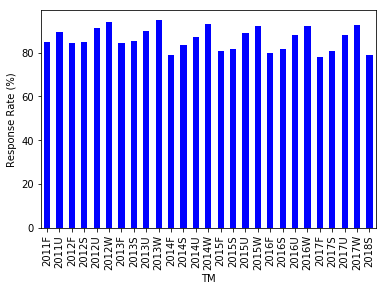

In [27]:
group_by_responserate = df.groupby(by=['TM'])
responserate_avg = group_by_responserate.mean()
responserate_count = group_by_responserate.count()
responserate_avg.RESPONSERATE = responserate_avg.RESPONSERATE * 100
responserate_avg.RESPONSERATE.plot.bar(color='blue')
plt.ylabel('Response Rate (%)')
plt.show()

### Average Course Evaluation



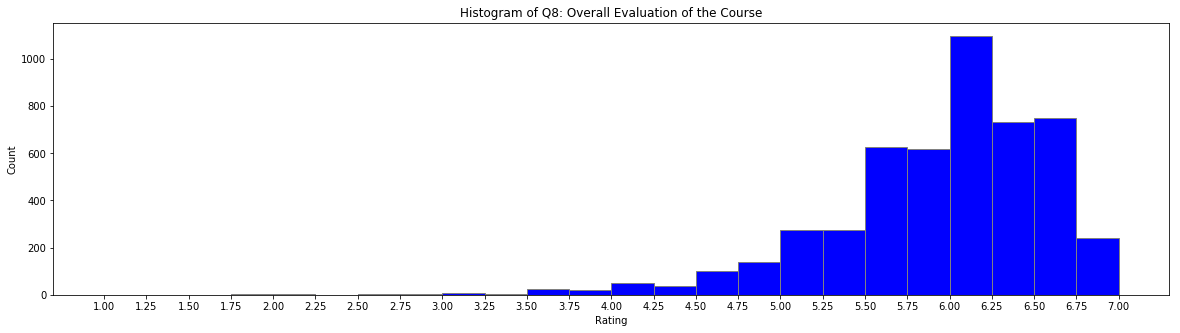

Average:  5.93
Standard deviation:  0.65
Median:  6.0


In [28]:
data = df.AVG_Q8_TR.dropna()
fig, ax = plt.subplots(figsize=(20, 5))
num_bins=24
counts, bins, patches = ax.hist(data, num_bins, facecolor='blue', edgecolor='gray')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
# Set the xaxis's tick labels to be formatted with 1 decimal place...
#ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

# Label the raw counts and the percentages below the x-axis...
#bin_centers = 0.5 * np.diff(bins) + bins[:-1]

#for count, x in zip(counts, bin_centers):
#    # Label the raw counts
#    ax.annotate(str(count), xy=(x, 0), xycoords=('data', 'axes fraction'),
#        xytext=(0, -18), textcoords='offset points', va='top', ha='center')

    # Label the percentages
#    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
#    ax.annotate(percent, xy=(x, 0), xycoords=('data', 'axes fraction'),
#        xytext=(0, -32), textcoords='offset points', va='top', ha='center')


# Give ourselves some more room at the bottom of the plot
#plt.subplots_adjust(bottom=0.15)
mu = data.mean()
sigma = data.std()
median = data.median()
#y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
#ax.plot(bins, y, '--')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title(r'Histogram of Q8: Overall Evaluation of the Course')
plt.show()
print("Average: ", "%.2f" % mu)
print("Standard deviation: ", "%.2f" % sigma)
print("Median: ", median)

### Most courses are rated pretty well.  
The most common average rating for a course is between 6 and 6.25 with the average at 5.9.  However, the standard deviation of the ratings is 0.79.

We also see a number of outliers between 0 and 0.25.  I'd like to dig into courses that have a rating of 0 to evaluate whether this is real data of that we should throw this data out.

In [29]:
df_zero = df.loc[df['AVG_Q8_TR'] == 0]

#df.loc[df['column_name'] == some_value]
df_zero
#df = df[~df['TM'].str.contains("Q|TM", na=False)] 


8,TM,CRS_N,CRS_SEC,TITLE,INSTR,N_ST,R_ST,TRIM_ST,AVG_X_GR,AVG_A,...,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,AVG_Q9,AVG_Q9_TM,CRS_NUM,RESPONSERATE


Ok, this definitely looks like data we can throw out.  All of these courses have 0 or 1 responses and evaluation results of zeroes.

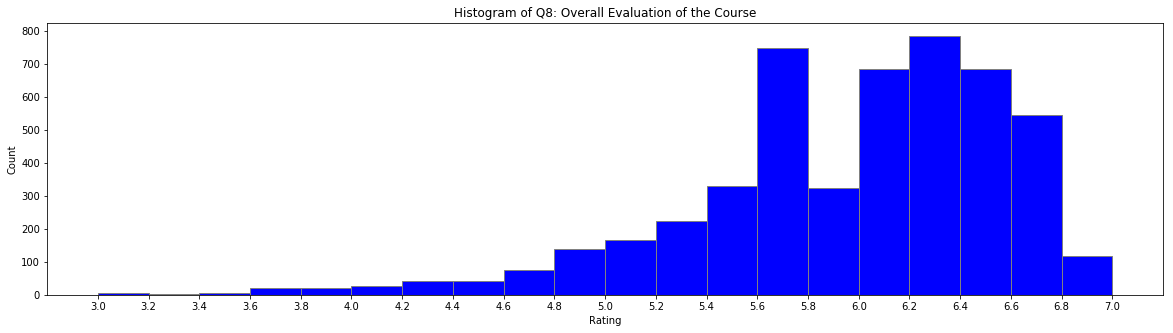

Average:  5.93
Standard deviation:  0.65
Median:  6.0


In [30]:
df_zeroes = df[df.AVG_Q8_TR != 0]
data = df_zeroes.AVG_Q8_TR.dropna()
fig, ax = plt.subplots(figsize=(20, 5))
num_bins=20
counts, bins, patches = ax.hist(data, num_bins, facecolor='blue', edgecolor='gray', range=[3, 7])

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)
sigma = data.std()
median = data.median()
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title(r'Histogram of Q8: Overall Evaluation of the Course')
plt.show()
print("Average: ", "%.2f" % mu)
print("Standard deviation: ", "%.2f" % sigma)
print("Median: ", median)

Removing the outlers substantially reduced the standard deivation from 0.79 to 0.66.

In [31]:
#Code above worked as expected so pass df_zeroes to df
df = df_zeroes.copy()
df.dtypes

8
TM               object
CRS_N            object
CRS_SEC          object
TITLE            object
INSTR            object
N_ST             object
R_ST            float64
TRIM_ST         float64
AVG_X_GR        float64
AVG_A           float64
AVG_B           float64
AVG_C           float64
AVG_D           float64
AVG_F           float64
AVG_Q1          float64
AVG_Q1_TR       float64
AVG_Q2          float64
AVG_Q2_TR       float64
AVG_Q3          float64
AVG_Q3_TR       float64
AVG_Q4          float64
AVG_Q4_TR       float64
AVG_Q5          float64
AVG_Q5_TR       float64
AVG_Q6          float64
AVG_Q6_TR       float64
AVG_Q7          float64
AVG_Q7_TR       float64
AVG_Q8          float64
AVG_Q8_TR       float64
AVG_Q9          float64
AVG_Q9_TM       float64
CRS_NUM           int64
RESPONSERATE    float64
dtype: object

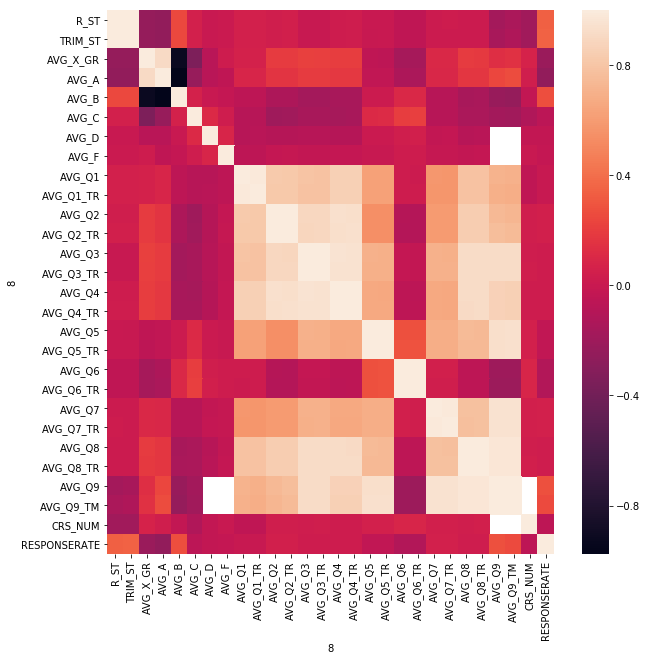

In [32]:
#plt.matshow(df.corr())

#import pandas.rpy.common as com
import seaborn as sns

# calculate the correlation matrix
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [33]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})

C:\Users\dancb\Anaconda3\lib\site-packages\matplotlib\colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


8,R_ST,TRIM_ST,AVG_X_GR,AVG_A,AVG_B,AVG_C,AVG_D,AVG_F,AVG_Q1,AVG_Q1_TR,AVG_Q2,AVG_Q2_TR,AVG_Q3,AVG_Q3_TR,AVG_Q4,AVG_Q4_TR,AVG_Q5,AVG_Q5_TR,AVG_Q6,AVG_Q6_TR,AVG_Q7,AVG_Q7_TR,AVG_Q8,AVG_Q8_TR,AVG_Q9,AVG_Q9_TM,CRS_NUM,RESPONSERATE
8,,,,,,,,,,,,,,,,,,,,,,,,,,,,
R_ST,1,0.99942,-0.238464,-0.250335,0.248246,0.055625,0.00214999,0.00859855,0.055753,0.0568141,0.0427812,0.0451065,-0.00996478,-0.00447555,0.0246964,0.0294584,-0.00188031,0.00267674,-0.0464036,-0.0425637,0.0177403,0.0210047,0.0157075,0.0185411,-0.168876,-0.134963,-0.182436,0.343016
TRIM_ST,0.99942,1,-0.240328,-0.252687,0.250733,0.0550234,0.00163418,0.00831582,0.0564634,0.0565243,0.0429909,0.0444945,-0.0100046,-0.00543591,0.0246489,0.0285606,-0.00295996,0.000883839,-0.0468698,-0.0426014,0.0175368,0.019712,0.0154031,0.0173823,-0.156245,-0.122649,-0.184491,0.34812
AVG_X_GR,-0.238464,-0.240328,1,0.910686,-0.912854,-0.344758,-0.0724967,0.0217506,0.0619912,0.0605529,0.19226,0.19024,0.215681,0.212904,0.202108,0.198072,-0.047445,-0.0508376,-0.158835,-0.161649,0.104269,0.102857,0.190893,0.187371,0.129366,0.148761,0.0688576,-0.218631
AVG_A,-0.250335,-0.252687,0.910686,1,-0.974549,-0.229596,-0.0781243,-0.0489089,0.0845678,0.0850165,0.163136,0.161717,0.193689,0.190605,0.178255,0.175096,-0.0349957,-0.0378806,-0.132471,-0.134801,0.0934518,0.0929541,0.171203,0.167749,0.243466,0.262742,0.0412204,-0.251836
AVG_B,0.248246,0.250733,-0.912854,-0.974549,1,0.0623972,0.00310176,-0.0197417,-0.0556107,-0.0563998,-0.133215,-0.132409,-0.170343,-0.16723,-0.153769,-0.151117,0.0172,0.0195789,0.10026,0.102,-0.0807823,-0.0809283,-0.149657,-0.146348,-0.221701,-0.240177,-0.0267303,0.269901
AVG_C,0.055625,0.0550234,-0.344758,-0.229596,0.0623972,1,0.107014,0.0292432,-0.0847343,-0.080622,-0.189015,-0.185548,-0.154562,-0.154412,-0.158293,-0.155509,0.110627,0.114095,0.204609,0.207871,-0.086796,-0.0840296,-0.141197,-0.140666,-0.178346,-0.185962,-0.113824,-0.0586752
AVG_D,0.00214999,0.00163418,-0.0724967,-0.0781243,0.00310176,0.107014,1,0.0864658,-0.079933,-0.0776018,-0.0935112,-0.0931458,-0.0856697,-0.0851894,-0.0916913,-0.0881419,0.00872117,0.00893347,0.0413653,0.0438992,-0.0277616,-0.0232402,-0.0810281,-0.0780376,nan,nan,-0.0282453,-0.0329257
AVG_F,0.00859855,0.00831582,0.0217506,-0.0489089,-0.0197417,0.0292432,0.0864658,1,-0.0530104,-0.0506286,-0.019971,-0.0178609,-0.0282732,-0.0267906,-0.0244519,-0.0231721,-0.00723681,-0.00630922,0.0281079,0.0278387,-0.0137838,-0.0122907,-0.0274656,-0.024636,nan,nan,0.00235291,-0.0249406
AVG_Q1,0.055753,0.0564634,0.0619912,0.0845678,-0.0556107,-0.0847343,-0.079933,-0.0530104,1,0.991121,0.826654,0.821346,0.794706,0.790819,0.860103,0.856569,0.628196,0.622324,0.0221163,0.0192785,0.576908,0.568776,0.79095,0.787976,0.712627,0.70361,-0.0432466,-0.00524141


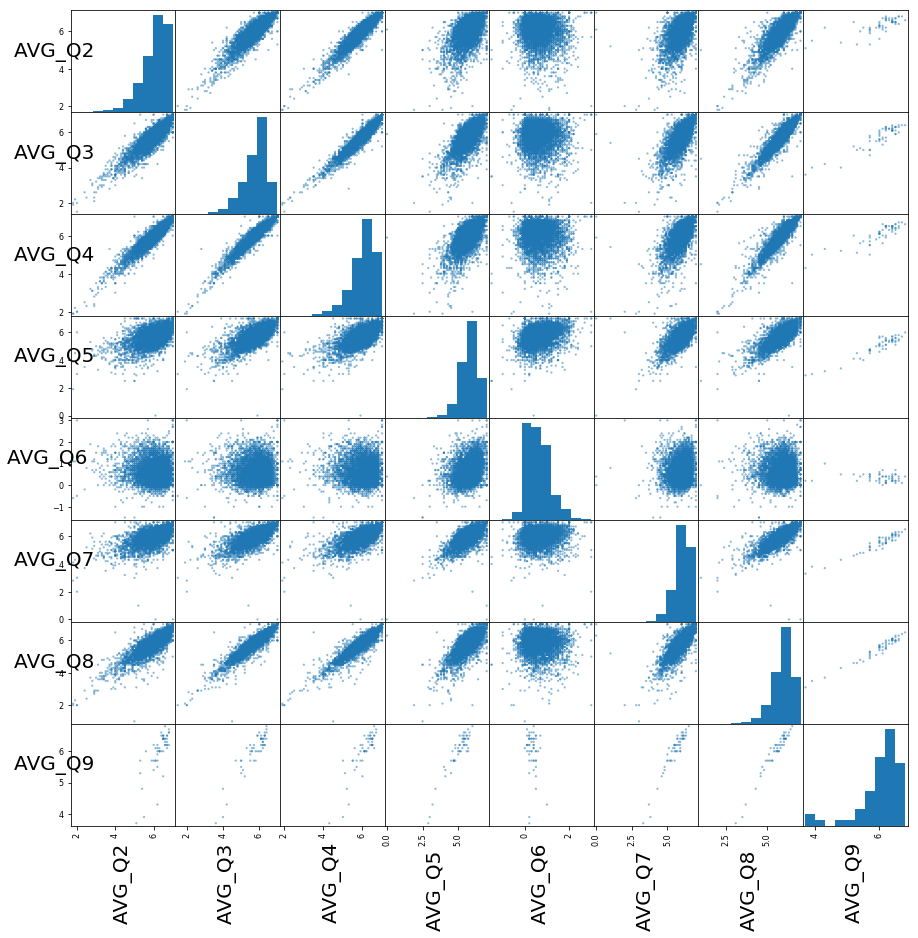

In [34]:
from pandas.plotting import scatter_matrix

#scatter_matrix(df.iloc[:,15:23])

scatter_matrix = pd.plotting.scatter_matrix(
    df.iloc[:,[16,18,20,22,24,26,28,30]],
    figsize  = [15, 15],
    marker   = ".",
    s        = 20)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 0)
    
plt.show()

* Not surprisingly, there are clear correlations between the survey questions.  If you enjoyed a course, you'll probably rate it highly in all of the survey questions.  
* Digging in a bit more, there are clear correlations between Q4 and Qs1-3 and between Q8 and Qs5-7 which makes sense.  
* Q6 asks how demanding of time the course was which doesn't have a strong correlation with any other questions.  Only Q5 shows a slight correlation (which makes sense).
* It's very rare that students say a course was not demanding enough of their time

### Data Survey Questions
* Q1 = The instructor was well prepared.
* Q2 = The instructor communicated well.
* Q3 = The instructor motivated me to learn.
* Q4 = Overall evaluation of the instructor.
* Q5 = This course was challenging and made me think.
* Q6 = This course was appropriately demanding of my time.
* Q7 = This course was relevant to my business education.
* Q8 = Overall evaluation of the course.
* Q9* = This course provided learning opportunities to increase awareness of how I communicate in teams and practice peer feedback.

### Adding columns for section and department

I want to explore any relationships between rating and section or department.

In [35]:
df['DEPT'] = df['CRS_N'].astype(str).str[0:4]
df.DEPT.unique()

array(['ACCT', 'BSPA', 'COR1', 'COR2', 'DBIN', 'ECON', 'FINC', 'INFO',
       'INTA', 'MCOM', 'MGMT', 'MKTG', 'NOCR', 'OPMG', 'STAT'],
      dtype=object)

The values in the new column look like they should.

I'll need to set the values I want to summarize to numeric so I can work with them in pandas.

In [36]:
df.CRS_SEC.unique()

array(['001', '010', '091', '000', '011', '012', '002', '003', '004',
       '005', '006', '00P', '013', '014', '00A', '00B', '020', '070',
       '0U1', '060', '042', '043', '045', '0U2', '0U3', '0U4', '061',
       '071', '0U5', '0U6', '0U7', '0U8', '041', '044', '09U', '09V',
       '0A1', '0A2', '0A3', '0A4', '0A5', '0A6', '0B1', '0B2', '0B3',
       '0B4', '0B5', '0B6', '021', '030', '022', '023', '025', '031',
       '032', '033', '034', '035', '024', '026', '027', '028', '029',
       '00N', '03A', '0W1', '09W', '0W2', '0W3', '0W4', '0W5', '0W6',
       '0W7', '0W8', '0W9', '02B', '02E', '02F', '02G', '02I', '036',
       '02A', '02C', '02D', '02H', '02J', '00C', '00D', '00E', '00F',
       '007'], dtype=object)

From some exploratory analysis I know the following (ignoring the leading 0):

* Sections beginning with 3 are in the evening
* Sections beginning with 2 are during the day
* Sections beginning with S are on the weekend
* Sections beginning with W are during the winter intensive period
* Sections beginning with D are for the "Doing Business In" courses
* Sections beginning with U1 are in the summer
* Sections beginning with 4, 6, 7 are in the summer

There are some sections that fall outside of these patterns.  Let's explore them a bit.

In [37]:
### some exploratory analysis
#df[df.CRS_SEC == "00A"].head(30)
df.groupby(by=['CRS_SEC']).count()
df[df.CRS_SEC == "005"].count()
#df_000.groupby(by=["TM"]).count()

8
TM              34
CRS_N           34
CRS_SEC         34
TITLE           34
INSTR           34
N_ST            34
R_ST            34
TRIM_ST         34
AVG_X_GR        34
AVG_A           34
AVG_B           34
AVG_C           34
AVG_D           34
AVG_F           34
AVG_Q1          34
AVG_Q1_TR       34
AVG_Q2          34
AVG_Q2_TR       34
AVG_Q3          34
AVG_Q3_TR       34
AVG_Q4          34
AVG_Q4_TR       34
AVG_Q5          34
AVG_Q5_TR       34
AVG_Q6          34
AVG_Q6_TR       34
AVG_Q7          34
AVG_Q7_TR       34
AVG_Q8          34
AVG_Q8_TR       34
AVG_Q9           5
AVG_Q9_TM        5
CRS_NUM         34
RESPONSERATE    34
DEPT            34
dtype: int64

In [38]:
#Adding column for section

df['SEC'] = df.CRS_SEC.str[-2]

#replacing U with 10, W with 11, and S with 12 so that they are numbers
df.SEC = df.SEC.replace({'U': 10,'W' : 11, 'S' : 12})


#Converting SEC to integers, coerce will put NAN where there are letters that can't be converted

#errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’

#If ‘raise’, then invalid parsing will raise an exception
#If ‘coerce’, then invalid parsing will be set as NaN


In [39]:
#Changing department to categorical values
#Making a copy of df to work with for correlations
df_corr = df.copy()

df_corr.SEC = pd.to_numeric(df_corr.SEC, errors = 'coerce')

df_corr['DEPT'] = df_corr.DEPT.astype('category')
df_corr['DEPT'] = df_corr.DEPT

#No need to do this
df_corr.DEPT = df_corr['DEPT'].cat.codes
#df.DEPT.cat.codes()
df_corr['DEPT'].unique()
df_corr['SEC'].unique()

array([ 0.,  1.,  9.,  2.,  7., 10.,  6.,  4., nan,  3., 11.])

Now lets include first number of the section in the correlation analysis.

In [40]:
#First make a new df by dropping NaNs from course section column
df_corr = df_corr[pd.notnull(df['SEC'])]
#df_corr = df[pd.notnull(df['DEPT'])]
df_corr.DEPT = pd.to_numeric(df_corr.DEPT)
df_corr.SEC = pd.to_numeric(df_corr.SEC)


#df.SEC = pd.to_numeric(df.SEC, errors = 'coerce')
df_corr.dtypes

8
TM               object
CRS_N            object
CRS_SEC          object
TITLE            object
INSTR            object
N_ST             object
R_ST            float64
TRIM_ST         float64
AVG_X_GR        float64
AVG_A           float64
AVG_B           float64
AVG_C           float64
AVG_D           float64
AVG_F           float64
AVG_Q1          float64
AVG_Q1_TR       float64
AVG_Q2          float64
AVG_Q2_TR       float64
AVG_Q3          float64
AVG_Q3_TR       float64
AVG_Q4          float64
AVG_Q4_TR       float64
AVG_Q5          float64
AVG_Q5_TR       float64
AVG_Q6          float64
AVG_Q6_TR       float64
AVG_Q7          float64
AVG_Q7_TR       float64
AVG_Q8          float64
AVG_Q8_TR       float64
AVG_Q9          float64
AVG_Q9_TM       float64
CRS_NUM           int64
RESPONSERATE    float64
DEPT               int8
SEC             float64
dtype: object

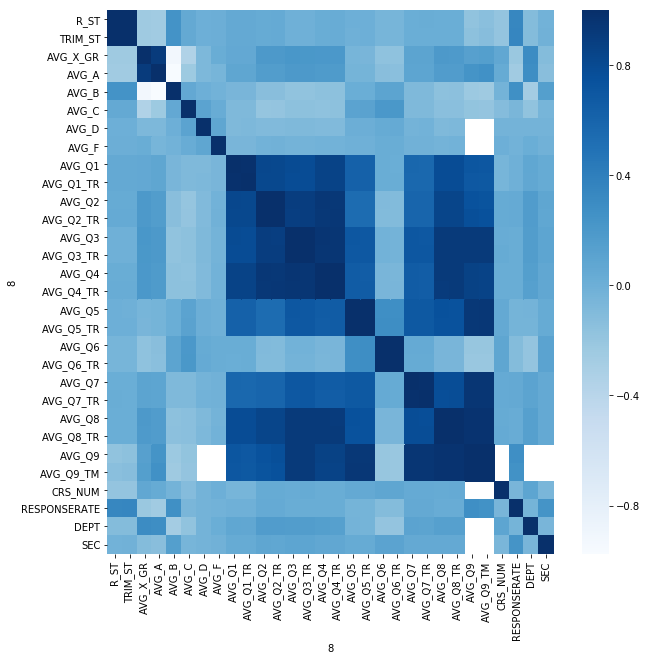

In [41]:
#calculate the correlation matrix
corr = df_corr.corr()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap="Blues")

There's a slight correlation between the DEPT and Q6 (course was demanding of my time).  It's worth a deeper look.

### What is the most demanding department?

In [42]:
df_corr.SEC.unique()

array([ 0.,  1.,  9.,  2.,  7., 10.,  6.,  4., nan,  3., 11.])

In [43]:
#Generating data for summary data frame
df_bySEC_avg = df.groupby(by=['SEC']).mean()
df_bySEC_avg = df_bySEC_avg.AVG_Q8_TR
df_bySEC_std = df.groupby(by=['SEC']).std()
df_bySEC_std = df_bySEC_std.AVG_Q8_TR
df_bySEC_cnt = df.groupby(by=['SEC']).count()
df_bySEC_cnt = df_bySEC_cnt.AVG_Q8_TR
df_bySEC_stats = pd.concat([df_bySEC_avg, df_bySEC_std, df_bySEC_cnt], axis=1)
df_bySEC_stats.columns = ["AVG", "STD", "CNT"]


df_byDEPT_avg = df.groupby(by=['DEPT']).mean()
df_byDEPT_avg = df_byDEPT_avg.AVG_Q8_TR
df_byDEPT_std = df.groupby(by=['DEPT']).std()
df_byDEPT_std = df_byDEPT_std.AVG_Q8_TR
df_byDEPT_cnt = df.groupby(by=['DEPT']).count()
df_byDEPT_cnt = df_byDEPT_cnt.AVG_Q8_TR
df_byDEPT_stats = pd.concat([df_byDEPT_avg, df_byDEPT_std, df_byDEPT_cnt], axis=1)
df_byDEPT_stats.columns = ["AVG", "STD", "CNT"]


#df_bySEC.AVG_Q8_TR.plot.bar(color='blue')
#plt.ylabel('Overall course evaluation (1-7)')
#plt.show()
print ("Sections Sorted by average Q8")
print(df_bySEC_stats.sort_values('AVG', ascending=False))

Sections Sorted by average Q8
          AVG       STD   CNT
SEC                          
9    6.093571  0.544853   140
4    6.083117  0.549977    77
11   6.075839  0.491839   298
10   5.991892  0.516672   259
0    5.951476  0.725770  1321
6    5.943590  0.736107   195
2    5.918226  0.766234   620
1    5.893575  0.560883   856
7    5.885052  0.608688   194
3    5.844193  0.613482  1016
A    5.733333  0.344656    12
B    5.650000  0.416697    12


* Sections beginning with 3 are in the evening
* Sections beginning with 2 are during the day
* Sections beginning with S are on the weekend (changed to 12)
* Sections beginning with W are during the winter intensive period (changed to 11)
* Sections beginning with D are for the "Doing Business In" courses
* Sections beginning with U1 are in the summer (changed to 10)
* Sections beginning with 4, 6, 7 are in the summer

In [44]:
df_bySECa = df[df.SEC == 11]
df_bySECb = df[df.SEC == 3]

df_bySEC_4 = df[df.SEC == 4]
df_bySEC_6 = df[df.SEC == 6]
df_bySEC_7 = df[df.SEC == 7]
df_bySEC_10 = df[df.SEC == 10]
df_bySEC_2 = df[df.SEC == 2]



df_bySEC_summer = pd.concat([df_bySEC_4, df_bySEC_6, df_bySEC_7, df_bySEC_10])

df_bySECa = df_bySEC_summer

import numpy as np, scipy.stats as st
#st.ttest_ind(df_bySECa.AVG_Q8_TR, df_bySECb.AVG_Q8_TR, axis=0, equal_var=False, nan_policy='omit')

st.ttest_ind(df.AVG_Q8_TR, df_bySEC_2.AVG_Q8_TR, axis=0, equal_var=False, nan_policy='omit')
#If p < 0.05, then the two groups of data are statisticically different

Ttest_indResult(statistic=nan, pvalue=nan)

* There is a statistical difference between classes during the evening (SEC 3) and classes during the day (2).  Classes during the day are better reviewed.
* Winter classes get better reviews than the population

In [45]:
print ("DEPT Sorted by average Q8")
df_byDEPT_stats.sort_values('AVG', ascending=False)

DEPT Sorted by average Q8


,AVG,STD,CNT
DEPT,,,
OPMG,6.188496,0.495831,113
MGMT,6.146174,0.482589,745
MCOM,6.125746,0.464437,268
BSPA,6.102857,0.589729,105
FINC,6.062443,0.615806,876
DBIN,6.013953,0.735193,86
MKTG,5.882420,0.553778,438
ECON,5.840672,0.669917,268
INFO,5.820930,0.628116,172


In [46]:
# I'll set errors = ignore so that anything that pandas can't convert to a number is just left alone.
#df_test[["R_ST", "N_ST"]] = df_test[["R_ST", "N_ST"]].apply(pd.to_numeric)
#df_test = df_test.apply(pd.to_numeric, errors='ignore')
group_by_dept = df.groupby(by=['DEPT']).mean().reset_index() #adding .reset_index() so that I can sort the resulting data
group_by_dept = group_by_dept.sort_values('AVG_Q8_TR', ascending=False)
group_by_dept_summ = group_by_dept[['DEPT','AVG_Q4_TR','AVG_Q6_TR','AVG_Q8_TR']]
#df1 = df[['a','b']]
group_by_dept_summ.DEPT.unique()


array(['OPMG', 'MGMT', 'MCOM', 'BSPA', 'FINC', 'DBIN', 'MKTG', 'ECON',
       'INFO', 'STAT', 'INTA', 'COR1', 'NOCR', 'ACCT', 'COR2'],
      dtype=object)

I would like to know if the difference betweeen subjects is statistically significant.  Our sample size is quite large, so I expcet them to be.  Let's run a p-test to be sure.

In [47]:
dfa = df[df.DEPT == "OPMG"]
import numpy as np, scipy.stats as st
st.ttest_ind(df.AVG_Q8_TR, dfa.AVG_Q8_TR, axis=0, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-5.499683233347618, pvalue=2.1584495087832522e-07)

Yes, it's defintiely significant for OPMG.  What about COR2 which is rated the lowest?

In [48]:
dfa = df[df.DEPT == "COR2"]
import numpy as np, scipy.stats as st
st.ttest_ind(df.AVG_Q8_TR, dfa.AVG_Q8_TR, axis=0, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=8.400187884876129, pvalue=4.062656828235851e-15)

Lets first look at what the highest rated department is by overall evaluation of the course (Q8).  Recall the survey questions below.

* Q1 = The instructor was well prepared.
* Q2 = The instructor communicated well.
* Q3 = The instructor motivated me to learn.
* Q4 = Overall evaluation of the instructor.
* Q5 = This course was challenging and made me think.
* Q6 = This course was appropriately demanding of my time.
* Q7 = This course was relevant to my business education.
* Q8 = Overall evaluation of the course.
* Q9* = This course provided learning opportunities to increase awareness of how I communicate in teams and practice peer feedback.

Now let's dig into the most demanding departments.

In [49]:
demanding = df.groupby(['DEPT'])
print(len(df))
print(len(demanding))
demanding = demanding.agg(['mean', 'std', 'count'])
demanding.AVG_Q6_TR.sort_values('mean', ascending=False)
#demanding.AVG_Q6_TR.sort_values('mean', ascending=False)
#demanding = demanding['demanding.AVG_Q6_TR' > 5]
#df_zeroes = df[df.AVG_Q8_TR != 0]

#import pandas_profiling
#pandas_profiling.ProfileReport(df)
print("The average demanding course value is: ", df.AVG_Q6_TR.mean())
demanding.AVG_Q6_TR.sort_values('mean', ascending=False)


5005
15
The average demanding course value is:  0.6103999999999983


,mean,std,count
DEPT,,,
STAT,1.145161,0.516824,62
INFO,0.902326,0.561218,172
ACCT,0.892342,0.670304,222
COR2,0.886161,0.399367,224
COR1,0.697425,0.486354,1165
INTA,0.693277,0.506522,119
FINC,0.633105,0.607402,876
MCOM,0.608955,0.422133,268
BSPA,0.608571,0.514803,105


Statistics is almost double the average!  Information systems and Accounting aren't far behind.

In [50]:
Q6Q8 = df.groupby(['DEPT'])
print(len(df))
print(len(Q6Q8))
Q6Q8 = Q6Q8.agg(['mean', 'std', 'count'])
Q6Q8.AVG_Q6_TR.sort_values('mean', ascending=False)
#demanding.AVG_Q6_TR.sort_values('mean', ascending=False)
#demanding = demanding['demanding.AVG_Q6_TR' > 5]
#df_zeroes = df[df.AVG_Q8_TR != 0]

#import pandas_profiling
#pandas_profiling.ProfileReport(df)
print("The average demanding course value is: ", df.AVG_Q6_TR.mean())
print("The average overall course rating is: ", df.AVG_Q8_TR.mean())

demanding[['AVG_Q8_TR','AVG_Q6_TR']].sort_values([('AVG_Q8_TR','mean')],ascending=False)

#df.sort_values([('Group1', 'C')], ascending=False)
#.sort_values('mean', ascending=False)

5005
15
The average demanding course value is:  0.6103999999999983
The average overall course rating is:  5.927020000000008


AVG_Q8_TR                 AVG_Q6_TR                
          mean       std count      mean       std count
DEPT                                                    
OPMG  6.188496  0.495831   113  0.554867  0.559016   113
MGMT  6.146174  0.482589   745  0.364832  0.420571   745
MCOM  6.125746  0.464437   268  0.608955  0.422133   268
BSPA  6.102857  0.589729   105  0.608571  0.514803   105
FINC  6.062443  0.615806   876  0.633105  0.607402   876
DBIN  6.013953  0.735193    86  0.223256  0.230434    86
MKTG  5.882420  0.553778   438  0.469863  0.525989   438
ECON  5.840672  0.669917   268  0.566045  0.624593   268
INFO  5.820930  0.628116   172  0.902326  0.561218   172
STAT  5.812903  0.445923    62  1.145161  0.516824    62
INTA  5.810924  0.629742   119  0.693277  0.506522   119
COR1  5.796481  0.711984  1165  0.697425  0.486354  1165
NOCR  5.761314  0.808343   137  0.301460  0.289265   137
ACCT  5.759910  0.691229   222  0.892342  0.670304   222
COR2  5.494196  0.758753   224  0.886161  0.399367   224

## Top Five Departments by Overall Course Evaluation
1. Operations Management
2. Management
3. Management Communication
4. Business & Society
5. Finance

#### What about the top reviewed professors?

I'll first need to throw out some data for professors that have less than 5 courses taught.

In [51]:
prof = df.copy()
prof = prof.groupby('INSTR').filter(lambda x: x['N_ST'].nunique() >= 10)
print("Rows removed: ", len(df) - len(prof))

#group_by_prof = group_by_prof.filter(lambda x: x['N_ST'] > 5)
#group_by_prof.set_index('INSTR').AVG_Q8_TR.plot.bar(color='blue')
#plt.ylabel('Overall course evaluation (1-7)')
#plt.show()
#grouped.filter(lambda x: x['B'].mean() > 3.)
#prof = prof.agg(['mean', 'std', 'count'])
prof = prof.groupby(['INSTR'])
prof = prof.agg(['mean', 'std', 'count']).round(2)
#prof.AVG_Q8_TR.sort_values('mean', ascending=False)
prof[['AVG_Q8_TR','AVG_Q4_TR']].sort_values([('AVG_Q4_TR','mean')],ascending=False).head(20)

Rows removed:  1713


AVG_Q8_TR             AVG_Q4_TR            
                           mean   std count      mean   std count
INSTR                                                            
SCHWED, GUSTAVO            6.72  0.15    17      6.79  0.13    17
HOLMES, ACHIM M.           6.69  0.10    14      6.78  0.11    14
DAMODARAN, ASWATH          6.62  0.13    16      6.76  0.09    16
LJUNGQVIST, ALEXANDER      6.61  0.28    15      6.75  0.21    15
MUELLER, HOLGER            6.67  0.34    23      6.75  0.29    23
SILBER, WILLIAM L.         6.63  0.19    19      6.73  0.18    19
MURPHY, CHARLES J.         6.61  0.16    20      6.67  0.14    20
BILLINGS, MARY             6.51  0.27    17      6.66  0.26    17
HENDLER, RICHARD M.        6.50  0.30    37      6.62  0.26    37
BURNS, RONNI               6.43  0.32    20      6.62  0.25    20
CHUGH, DOLLY               6.13  0.56    19      6.59  0.24    19
STROEBEL, JOHANNES         6.37  0.24    14      6.59  0.23    14
LOBEL, ILAN                6.61  0.29    11      6.59  0.30    11
LENNARD, DIANE             6.37  0.40    39      6.58  0.23    39
SCHMEITS, ANJOLEIN         6.47  0.19    42      6.56  0.18    42
GORMLEY, FRAN              6.48  0.32    12      6.55  0.27    12
BOWMAKER, SIMON            6.32  0.27    14      6.54  0.21    14
FOUDY, JOSEPH F.           6.24  0.41    26      6.54  0.30    26
YEO, JULIAN                6.39  0.36    33      6.52  0.32    33
LEVINA, NATALIA            6.29  0.34    15      6.51  0.38    15

## Top rated course?

In [52]:
course = df.copy()
course = course.groupby('CRS_N').filter(lambda x: x['CRS_N'].count() >= 10)
print("Rows removed: ", len(df) - len(course))

#group_by_prof = group_by_prof.filter(lambda x: x['N_ST'] > 5)
#group_by_prof.set_index('INSTR').AVG_Q8_TR.plot.bar(color='blue')
#plt.ylabel('Overall course evaluation (1-7)')
#plt.show()
#grouped.filter(lambda x: x['B'].mean() > 3.)
#prof = prof.agg(['mean', 'std', 'count'])
course = course.groupby(['CRS_N','TITLE'])
course = course.agg(['mean', 'std', 'count']).round(2)
#prof.AVG_Q8_TR.sort_values('mean', ascending=False)
course[['AVG_Q8_TR','AVG_Q4_TR']].sort_values([('AVG_Q8_TR','mean')],ascending=False).head(30)

Rows removed:  1208


AVG_Q8_TR             AVG_Q4_TR        \
                                            mean   std count      mean   std   
CRS_N        TITLE                                                             
FINC-GB.2332 FINANCIAL THEORY II            6.74  0.31    14      6.67  0.40   
FINC-GB.3365 PRIVATE EQUITY FINANCE         6.71  0.16    14      6.79  0.14   
FINC-GB.3199 CASE STDS-BANKRPCY&REORGS      6.69  0.10    14      6.78  0.11   
OPMG-GB.2312 OPERATIONS IN PANAMA           6.63  0.27    12      6.47  0.36   
INTA-GB.3105 GLB MKTS,HUM RGHT&THE PRE      6.60   NaN     1      6.60   NaN   
FINC-GB.2334 FINANCIAL SERVICES INDUST      6.60  0.17     3      6.70  0.17   
NOCR-GB.2046 COACHING FOR IMPACT            6.56  0.15     5      6.70  0.07   
MCOM-GB.2122 THE PERFORMING MANAGER         6.56  0.23     7      6.69  0.15   
FINC-GB.2333 FINANCIAL THEORY III           6.55  0.58    13      6.62  0.49   
BSPA-GB.2120 ENTERTAINMENT LAW              6.53  0.26    12      6.69  0.22   
BSPA-GB.2314 BUSINESS LAW                   6.51  0.24     8      6.64  0.24   
             BUSINESS LAW FOR MANAGERS      6.45  0.36    17      6.57  0.29   
FINC-GB.2302 CORPORATE FINANCE              6.42  0.31    80      6.51  0.33   
FINC-GB.3353 LAW&MGMT FINANCL SERVICES      6.41  0.18     8      6.44  0.29   
NOCR-GB.2046 PERFORMANCE COACHING           6.39  0.27    15      6.60  0.15   
MGMT-GB.2327 MANAGING GROWING COMPANIE      6.37  0.34    81      6.49  0.34   
FINC-GB.2334 INVESTMENT BANKING             6.36  0.52    19      6.45  0.45   
INFO-GB.3355 GLBL SRCNG&OPEN INNOVATN       6.35  0.24     4      6.38  0.29   
OPMG-GB.2350 DECISION MODELS&ANALYTICS      6.34  0.47    17      6.45  0.44   
FINC-GB.3361 ENTREPRENEURIAL FINANCE        6.34  0.27    20      6.46  0.25   
MGMT-GB.2375 IMPLEMENTING STRATEGY          6.32  0.13     5      6.36  0.05   
MGMT-GB.2159 COLLABORATN,CONFLCT&NEGTN      6.31  0.28   172      6.32  0.34   
MKTG-GB.2114 BUSINESS OF SPORTS MKTG        6.26  0.33    10      6.32  0.38   
MGMT-GB.3366 POWER & POLITICS               6.24  0.34    37      6.33  0.29   
FINC-GB.3173 VENTURE CAPITAL FINANCING      6.24  0.51    23      6.37  0.51   
MGMT-GB.2375 ADVANCED STRATEGY: TOOLS       6.24  0.29    27      6.44  0.23   
FINC-GB.2339 REAL ESTATE CAPITAL MKTS       6.23  0.21    17      6.28  0.22   
COR1-GB.2103 STRATEGY I                     6.23  0.37    71      6.37  0.40   
FINC-GB.3357 GLBL WEALTH MGT&PRVT BNKG      6.21  0.13     9      6.31  0.32   
FINC-GB.3176 TOPICS IN INVESTMENTS          6.20  0.32    18      6.22  0.32   

                                              
                                       count  
CRS_N        TITLE                            
FINC-GB.2332 FINANCIAL THEORY II          14  
FINC-GB.3365 PRIVATE EQUITY FINANCE       14  
FINC-GB.3199 CASE STDS-BANKRPCY&REORGS    14  
OPMG-GB.2312 OPERATIONS IN PANAMA         12  
INTA-GB.3105 GLB MKTS,HUM RGHT&THE PRE     1  
FINC-GB.2334 FINANCIAL SERVICES INDUST     3  
NOCR-GB.2046 COACHING FOR IMPACT           5  
MCOM-GB.2122 THE PERFORMING MANAGER        7  
FINC-GB.2333 FINANCIAL THEORY III         13  
BSPA-GB.2120 ENTERTAINMENT LAW            12  
BSPA-GB.2314 BUSINESS LAW                  8  
             BUSINESS LAW FOR MANAGERS    17  
FINC-GB.2302 CORPORATE FINANCE            80  
FINC-GB.3353 LAW&MGMT FINANCL SERVICES     8  
NOCR-GB.2046 PERFORMANCE COACHING         15  
MGMT-GB.2327 MANAGING GROWING COMPANIE    81  
FINC-GB.2334 INVESTMENT BANKING           19  
INFO-GB.3355 GLBL SRCNG&OPEN INNOVATN      4  
OPMG-GB.2350 DECISION MODELS&ANALYTICS    17  
FINC-GB.3361 ENTREPRENEURIAL FINANCE      20  
MGMT-GB.2375 IMPLEMENTING STRATEGY         5  
MGMT-GB.2159 COLLABORATN,CONFLCT&NEGTN   172  
MKTG-GB.2114 BUSINESS OF SPORTS MKTG      10  
MGMT-GB.3366 POWER & POLITICS             37  
FINC-GB.3173 VENTURE CAPITAL FINANCING    23  
MGMT-GB.2375 ADVANCED STRATEGY: TOOLS     27  
FINC-GB.2339 REAL ESTATE CAPITAL MK

## Top rated professors?

In [126]:
prof = df.copy()
#Only use data where a course occurs more than 10 times
prof = prof.groupby('INSTR').filter(lambda x: x['INSTR'].count() >= 10)
print("Rows removed: ", len(df) - len(prof))

#group_by_prof = group_by_prof.filter(lambda x: x['N_ST'] > 5)
#group_by_prof.set_index('INSTR').AVG_Q8_TR.plot.bar(color='blue')
#plt.ylabel('Overall course evaluation (1-7)')
#plt.show()
#grouped.filter(lambda x: x['B'].mean() > 3.)
#prof = prof.agg(['mean', 'std', 'count'])
prof = prof.groupby(['INSTR'])
prof = prof.agg(['mean', 'std', 'count']).round(2)
#prof.AVG_Q8_TR.sort_values('mean', ascending=False)
prof[['AVG_Q8_TR','AVG_Q4_TR']].sort_values([('AVG_Q8_TR','mean')],ascending=False).head(30)

Rows removed:  1448


AVG_Q8_TR             AVG_Q4_TR            
                            mean   std count      mean   std count
INSTR                                                             
SCHWED, GUSTAVO             6.72  0.15    17      6.79  0.13    17
HOLMES, ACHIM M.            6.69  0.10    14      6.78  0.11    14
MUELLER, HOLGER             6.67  0.34    23      6.75  0.29    23
SILBER, WILLIAM L.          6.63  0.19    19      6.73  0.18    19
DAMODARAN, ASWATH           6.62  0.13    16      6.76  0.09    16
LOBEL, ILAN                 6.61  0.29    11      6.59  0.30    11
MURPHY, CHARLES J.          6.61  0.16    20      6.67  0.14    20
LJUNGQVIST, ALEXANDER       6.61  0.28    15      6.75  0.21    15
AYALA, RICARDO E.           6.53  0.11    13      6.69  0.10    13
PETTIT, NATHAN C            6.53  0.35    10      6.82  0.17    10
BILLINGS, MARY              6.51  0.27    17      6.66  0.26    17
SEE, KELLY E.               6.50  0.30    12      6.51  0.31    12
HENDLER, RICHARD M.         6.50  0.30    37      6.62  0.26    37
GORMLEY, FRAN               6.48  0.32    12      6.55  0.27    12
SCHMEITS, ANJOLEIN          6.47  0.19    42      6.56  0.18    42
BURNS, RONNI                6.43  0.32    20      6.62  0.25    20
SAID, MAHER                 6.42  0.21    10      6.64  0.17    10
SCHNABL, PHILIPP            6.39  0.40    18      6.49  0.36    18
YEO, JULIAN                 6.39  0.36    33      6.52  0.32    33
STROEBEL, JOHANNES          6.37  0.24    14      6.59  0.23    14
LENNARD, DIANE              6.37  0.40    39      6.58  0.23    39
OKUN, GLENN A               6.36  0.26   168      6.51  0.22   168
GABAIX, XAVIER              6.35  0.66    13      6.50  0.60    13
MORRISON, ELIZABETH W.      6.35  0.29    15      6.37  0.21    15
TUZHILIN, ALEXANDER S.      6.34  0.53    12      6.34  0.53    12
HOWARD, ELIZABETH           6.33  0.21    19      6.31  0.26    19
ROGERS, BRIAN               6.33  0.36    13      6.39  0.39    13
BLADER, STEVEN L            6.33  0.37    32      6.40  0.24    32
BOWMAKER, SIMON             6.32  0.27    14      6.54  0.21    14
D'SOUZA, IAN C.             6.31  0.24    22      6.45  0.23    22

### Top Rated Course/Prof Combination

In [189]:
course_prof = df.copy()

#adding new column
course_prof['CRS_N_INSTR'] = course_prof['CRS_N'].astype(str) + str(" ") + course_prof['INSTR'].astype(str)
#counting the number of unique combinations and returning the number
print("number of unique course/prof combinations: ",len(course_prof['CRS_N_INSTR'].unique()))

#creating a new data frame
course_prof2 = df.copy()

#set the minimum number of times the prof has taught a course
count = 10

#At least 5 students on average in the class
N=5

#filter out any course/prof combinations with less than 10 occurances
course_prof2 = course_prof2.groupby(['CRS_N','INSTR']).filter((lambda x : x['TM'].count() >= count))

#average the survey results to 2 decimal places
course_prof2 = course_prof2.groupby(['CRS_N','INSTR']).mean().round(2)

#print the number of course/prof combinations after the filter
print("number of unique course/prof combinations with n >", count-1,": ", len(course_prof2))

#Sort by Q8 = overall evaluation of the course, but also return Q4 and R_ST
course_prof2 = course_prof2[['R_ST','AVG_Q6_TR','AVG_Q8_TR','AVG_Q4_TR']].sort_values([('AVG_Q8_TR')],ascending=False).head(30)

#Reset the index so that it is no longer a multiindex data frame (not needed)
course_prof2 = course_prof2.reset_index(level=[0,1])

#create a data frame with the course titles and numbers
CRS_N = df[['CRS_N','TITLE']].copy()

#merge the course/prof data frame with the course title names based on the course number (to add back in the titles of the courses)
pretty = course_prof2.merge(CRS_N, left_on='CRS_N', right_on='CRS_N')

#Add a column of course + instructer
pretty['drop'] = pretty['CRS_N'].astype(str) + str(" ") + pretty['INSTR'].astype(str)

#drop the duplicates in the created column
pretty =  pretty.drop_duplicates(subset='drop')

#drop the created column
pretty = pretty.drop(columns = ['drop'])

#rearrange the columns
pretty = pretty[['CRS_N', 'TITLE', 'INSTR', 'R_ST','AVG_Q8_TR','AVG_Q4_TR','AVG_Q6_TR']]

#only show rows with students > N
pretty = pretty[(pretty['R_ST'] > N)]

#rename the columns
pretty.columns = ['Course Number','Course Title','Instructor',
                        'Avg. Number of Students','Overall Evaluation of the Course',
                        'Overall Evaluation of the Instructor',
                       'Course Was Demanding']
pretty

number of unique course/prof combinations:  991
number of unique course/prof combinations with n > 9 :  127


,Course Number,Course Title,Instructor,Avg. Number of Students,Overall Evaluation of the Course,Overall Evaluation of the Instructor,Course Was Demanding
0,FINC-GB.3365,PRIVATE EQUITY FINANCE,"SCHWED, GUSTAVO",39.00,6.71,6.79,1.89
14,FINC-GB.3199,CASE STDS-BANKRPCY&REORGS,"HOLMES, ACHIM M.",32.21,6.69,6.78,1.19
28,FINC-GB.3331,VALUATION,"DAMODARAN, ASWATH",136.00,6.64,6.78,1.00
71,FINC-GB.3331,VALUATION,"SCHMEITS, ANJOLEIN",51.20,6.34,6.45,1.19
114,COR1-GB.2311,FOUNDATIONS OF FINANCE,"SILBER, WILLIAM L.",93.63,6.63,6.73,0.99
236,OPMG-GB.2350,DECISION MODELS,"LOBEL, ILAN",37.36,6.61,6.59,0.58
284,FINC-GB.2334,INVESTMENT BANKING,"MURPHY, CHARLES J.",108.35,6.61,6.67,0.06
312,NOCR-GB.2046,PERFORMANCE COACHING,"LENNARD, DIANE",108.85,6.55,6.66,0.23
332,FINC-GB.2302,CORPORATE FINANCE,"SCHMEITS, ANJOLEIN",44.44,6.54,6.63,1.19
412,FINC-GB.2302,CORPORATE FINANCE,"MARCIANO, ANTHONY M",47.25,6.50,6.54,0.79


# How about by department?

In [191]:
pretty['DEPT'] = pretty['Course Number'].astype(str).str[0:4]
pretty_dept = pretty[(pretty['DEPT'] == "FINC")]
pretty_dept = pretty_dept.drop(columns = ['DEPT'])
pretty_dept

,Course Number,Course Title,Instructor,Avg. Number of Students,Overall Evaluation of the Course,Overall Evaluation of the Instructor,Course Was Demanding
0,FINC-GB.3365,PRIVATE EQUITY FINANCE,"SCHWED, GUSTAVO",39.00,6.71,6.79,1.89
14,FINC-GB.3199,CASE STDS-BANKRPCY&REORGS,"HOLMES, ACHIM M.",32.21,6.69,6.78,1.19
28,FINC-GB.3331,VALUATION,"DAMODARAN, ASWATH",136.00,6.64,6.78,1.00
71,FINC-GB.3331,VALUATION,"SCHMEITS, ANJOLEIN",51.20,6.34,6.45,1.19
284,FINC-GB.2334,INVESTMENT BANKING,"MURPHY, CHARLES J.",108.35,6.61,6.67,0.06
332,FINC-GB.2302,CORPORATE FINANCE,"SCHMEITS, ANJOLEIN",44.44,6.54,6.63,1.19
412,FINC-GB.2302,CORPORATE FINANCE,"MARCIANO, ANTHONY M",47.25,6.50,6.54,0.79
492,FINC-GB.2302,CORPORATE FINANCE,"MUELLER, HOLGER",27.00,6.43,6.53,0.18
2173,FINC-GB.3173,VENTURE CAPITAL FINANCING,"D'SOUZA, IAN C.",34.36,6.39,6.52,0.20
2196,FINC-GB.3361,ENTREPRENEURIAL FINANCE,"OKUN, GLENN A",44.00,6.38,6.50,0.48


### Apply some ML!

In [54]:
#First, I need to get the data frame ready for some ML by changing any "objects" to categorical values
df_ML = df_corr.copy() #start with the correlation data frame from before
print(df_corr.dtypes)
print(df_corr.head())

8
TM               object
CRS_N            object
CRS_SEC          object
TITLE            object
INSTR            object
N_ST             object
R_ST            float64
TRIM_ST         float64
AVG_X_GR        float64
AVG_A           float64
AVG_B           float64
AVG_C           float64
AVG_D           float64
AVG_F           float64
AVG_Q1          float64
AVG_Q1_TR       float64
AVG_Q2          float64
AVG_Q2_TR       float64
AVG_Q3          float64
AVG_Q3_TR       float64
AVG_Q4          float64
AVG_Q4_TR       float64
AVG_Q5          float64
AVG_Q5_TR       float64
AVG_Q6          float64
AVG_Q6_TR       float64
AVG_Q7          float64
AVG_Q7_TR       float64
AVG_Q8          float64
AVG_Q8_TR       float64
AVG_Q9          float64
AVG_Q9_TM       float64
CRS_NUM           int64
RESPONSERATE    float64
DEPT               int8
SEC             float64
dtype: object
8      TM         CRS_N CRS_SEC                      TITLE            INSTR  \
9   2013F  ACCT-GB.2303     001   FINANCI

TM, CRS_N, CRS_SEC, TITLE, INSTR, N_ST are all objects currently.

TM = term (so 2013F means fall 2013).  
The year probably doesn't matter for our model, but the term (fall, summer, etc.) does so let's make a new column

# Predicting Overall Course Evaluation

In [119]:
df_ML = df_corr.copy()
#Need to keep the last letter from the TM column and set it as a category data type
#df_ML['TERM'] = df_ML.TM.str[-1:].astype('category')
#drop the TM column
#We can go ahead and drop the TITLE column since that information is a part of the CRS_N column
df_ML = df_ML.drop(['TM', 'TITLE'], axis=1)

#now I will set the CRS_N, CRS_SEC, and INSTR columns as categories.  
#I'm using seperate lines so each column gets its own set of categories
#df_ML['CRS_N'] = df_ML['CRS_N'].astype('category')
#df_ML['CRS_SEC'] = df_ML['CRS_SEC'].astype('category')
#df_ML['INSTR'] = df_ML['INSTR'].astype('category')
df_ML['N_ST'] = df_ML['N_ST'].astype('float')

#I'll make a DEPT column
df_ML['DEPT'] = df_ML['CRS_N'].astype(str).str[0:4]
#df_ML['DEPT'] = df_ML['DEPT'].astype('category')


There are a lot of columns I don't need.  I want to predict AVG_Q8_TR (overall course evaluation) so I'll keep that one. The rest of the survey questions I can drop.  Since I want to help students choose which classes to register for, I don't want to include the other survey questions in the model since that information is not available until after the course is over.

"We'll also want to remove columns that can only be computed if you already know the average rating. Including these columns will destroy the purpose of the classifier, which is to predict the rating without any previous knowledge. Using columns that can only be computed with knowledge of the target can lead to overfitting, where your model is good in a training set, but doesn't generalize well to future data."

In [120]:
df_ML = df_ML.drop(['AVG_X_GR', 'AVG_A','AVG_B','AVG_C','AVG_D','AVG_F',
                    'AVG_Q1','AVG_Q1_TR',
                   'AVG_Q2','AVG_Q2_TR',
                   'AVG_Q3','AVG_Q3_TR',
                   'AVG_Q4','AVG_Q4_TR',
                   'AVG_Q5','AVG_Q5_TR',
                   'AVG_Q6','AVG_Q6_TR',
                   'AVG_Q7','AVG_Q7_TR',
                    'AVG_Q8',
                   'AVG_Q9','AVG_Q9_TM',
                   'RESPONSERATE','AVG_Q1_TR',
                   'SEC','TRIM_ST','CRS_N'], axis=1)
df_ML = df_ML.reset_index()
df_ML.head()
#len(df_ML)
df_ML.dtypes

8
index          int64
CRS_SEC       object
INSTR         object
N_ST         float64
R_ST         float64
AVG_Q8_TR    float64
CRS_NUM        int64
DEPT          object
dtype: object

Now I have several variables I want to input into a model to predict the overall course evaluation.

I'm going to take the data set and use 80% of it (randomly selected) to train the model.  The remaining 20% will be used to test the model.

Note: I assumed that the year of the course has little effect on the course evaluation.  One flaw in this assumption could be professors that get better in the future as they teach more courses.

I have a few categorical values that I need to pre-process.  I'll use a sklearn feature called OneHotEncoder to create an array of 0 or 1 for each category.

df_ML = df_ML.OneHotEncoder(handle_unknown='ignore')


In [121]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in df_ML.columns.values:
    # Encoding only categorical variables
    if df_ML[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
       data=df_ML[col]
       le.fit(data.values)
       df_ML[col]=le.transform(df_ML[col])

df_ML.head()
df_ML.isnull().any()
df_ML = df_ML[pd.notnull(df_ML['AVG_Q8_TR'])]
len(df_ML)

5000

In [122]:
# Store the variable we'll be predicting on.
target = "AVG_Q8_TR"

# Import a convenient function to split the sets.
from sklearn.model_selection import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = df_ML.sample(frac=0.8, random_state=1)

# Select anything not in the training set and put it in the testing set.
test = df_ML.loc[~df_ML.index.isin(train.index)]

# Print the shapes of both sets.
print(train.shape)
print(test.shape)
train.head()

(4000, 8)
(1000, 8)


8,index,CRS_SEC,INSTR,N_ST,R_ST,AVG_Q8_TR,CRS_NUM,DEPT
2769,187,0,476,25.0,23.0,6.7,2105,9
4772,203,16,269,13.0,8.0,5.2,3336,8
3819,274,41,403,28.0,18.0,6.1,2150,11
3504,288,21,281,12.0,9.0,6.7,2350,11
2740,154,41,237,47.0,36.0,5.3,3321,6


We'll start with linear regression

In [123]:
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()

columns = df_ML.columns.tolist()
columns = [c for c in columns if c not in ["AVG_Q8_TR"]]


# Fit the model to the training data.
model.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

0.3660245161764594

0.2708192247128323
1000
1000


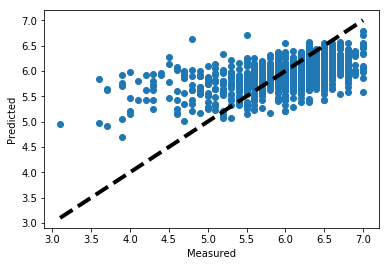

In [125]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=500, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
print(mean_squared_error(predictions, test[target]))

y= test[target]

print(len(y))
print(len(predictions))

fig, ax = plt.subplots()
ax.scatter(y, predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [76]:
from sklearn.svm import SVR

#Create a svm Classifier
clf = SVR() # Linear Kernel

#Train the model using the training sets
clf.fit(train[columns], train[target])

#Predict the response for test dataset
predictions = clf.predict(test[columns])
mean_squared_error(predictions, test[target])

0.39167050388637215

# Predicting Demanding Courses

In [110]:
df_ML = df_corr.copy()
#Need to keep the last letter from the TM column and set it as a category data type
#df_ML['TERM'] = df_ML.TM.str[-1:].astype('category')
#drop the TM column
#We can go ahead and drop the TITLE column since that information is a part of the CRS_N column
df_ML = df_ML.drop(['TM', 'TITLE'], axis=1)

#now I will set the CRS_N, CRS_SEC, and INSTR columns as categories.  
#I'm using seperate lines so each column gets its own set of categories
#df_ML['CRS_N'] = df_ML['CRS_N'].astype('category')
#df_ML['CRS_SEC'] = df_ML['CRS_SEC'].astype('category')
#df_ML['INSTR'] = df_ML['INSTR'].astype('category')
df_ML['N_ST'] = df_ML['N_ST'].astype('float')

#I'll make a DEPT column
df_ML['DEPT'] = df_ML['CRS_N'].astype(str).str[0:4]
#df_ML['DEPT'] = df_ML['DEPT'].astype('category')


In [111]:
df_ML = df_ML.drop(['AVG_X_GR', 'AVG_A','AVG_B','AVG_C','AVG_D','AVG_F',
                    'AVG_Q1','AVG_Q1_TR',
                   'AVG_Q2','AVG_Q2_TR',
                   'AVG_Q3','AVG_Q3_TR',
                   'AVG_Q4','AVG_Q4_TR',
                   'AVG_Q5','AVG_Q5_TR',
                   'AVG_Q6',
                   'AVG_Q7','AVG_Q7_TR',
                    'AVG_Q8', 'AVG_Q8_TR',
                   'AVG_Q9','AVG_Q9_TM',
                   'RESPONSERATE','AVG_Q1_TR',
                   'SEC','TRIM_ST','CRS_N'], axis=1)
df_ML = df_ML.reset_index()
df_ML.head()
#len(df_ML)
df_ML.dtypes

8
index          int64
CRS_SEC       object
INSTR         object
N_ST         float64
R_ST         float64
AVG_Q6_TR    float64
CRS_NUM        int64
DEPT          object
dtype: object

In [112]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in df_ML.columns.values:
    # Encoding only categorical variables
    if df_ML[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
       data=df_ML[col]
       le.fit(data.values)
       df_ML[col]=le.transform(df_ML[col])

df_ML.head()
df_ML.isnull().any()
df_ML = df_ML[pd.notnull(df_ML['AVG_Q6_TR'])]
len(df_ML)

5000

In [113]:
# Store the variable we'll be predicting on.
target = "AVG_Q6_TR"

# Import a convenient function to split the sets.
from sklearn.model_selection import train_test_split

# Generate the training set.  Set random_state to be able to replicate results.
train = df_ML.sample(frac=0.8, random_state=1)

# Select anything not in the training set and put it in the testing set.
test = df_ML.loc[~df_ML.index.isin(train.index)]

# Print the shapes of both sets.
print(train.shape)
print(test.shape)
#train.head()

(4000, 8)
(1000, 8)


8,index,CRS_SEC,INSTR,N_ST,R_ST,AVG_Q6_TR,CRS_NUM,DEPT
2769,187,0,476,25.0,23.0,0.8,2105,9
4772,203,16,269,13.0,8.0,0.0,3336,8
3819,274,41,403,28.0,18.0,0.4,2150,11
3504,288,21,281,12.0,9.0,0.4,2350,11
2740,154,41,237,47.0,36.0,0.9,3321,6


In [114]:
from sklearn.linear_model import LinearRegression

# Initialize the model class.
model = LinearRegression()

columns = df_ML.columns.tolist()
columns = [c for c in columns if c not in ["AVG_Q6_TR"]]


# Fit the model to the training data.
model.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [115]:
# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
mean_squared_error(predictions, test[target])

0.25917242610233576

0.1749393808939347
1000
1000


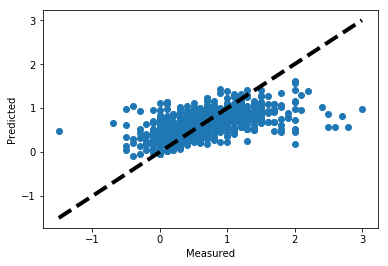

In [116]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with some parameters.
model = RandomForestRegressor(n_estimators=500, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
model.fit(train[columns], train[target])
# Make predictions.
predictions = model.predict(test[columns])
# Compute the error.
print(mean_squared_error(predictions, test[target]))

y= test[target]

print(len(y))
print(len(predictions))

fig, ax = plt.subplots()
ax.scatter(y, predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()